In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read in the gapminder_clean.csv data as a pandas DataFrame.

In [21]:
df = pd.read_csv('/Users/pinchichen/2025S lab/assignment/gapminder_clean.csv')
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


### 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

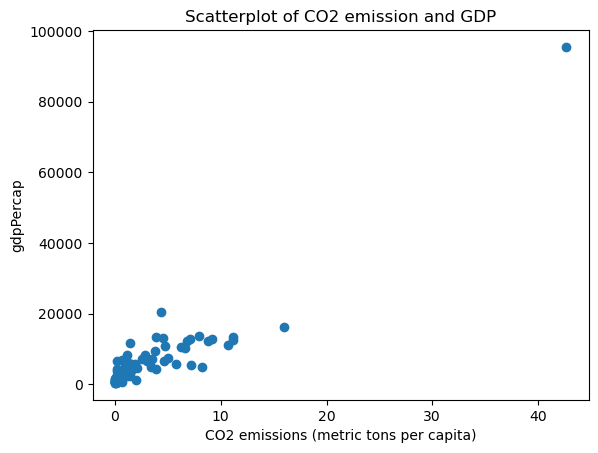

In [14]:
subset=["CO2 emissions (metric tons per capita)", "gdpPercap"]
data_1962 = df[df['Year']==1962]
data_1962 = data_1962.dropna(subset=["CO2 emissions (metric tons per capita)", "gdpPercap"])
plt.figure()
plt.scatter(data_1962['CO2 emissions (metric tons per capita)'],data_1962['gdpPercap'])
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('gdpPercap')
plt.title('Scatterplot of CO2 emission and GDP')
plt.show()

### 3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

In [15]:

data_corr = data_1962['CO2 emissions (metric tons per capita)'].corr(data_1962['gdpPercap'])
data_corr
from scipy.stats import pearsonr
corr, p_value = pearsonr(data_1962['CO2 emissions (metric tons per capita)'], data_1962['gdpPercap'])
print('corr: {}\n'.format(corr))
print('p value: {}'.format(p_value))


corr: 0.9260816725019472

p value: 1.1286792210038664e-46


### 4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

In [ ]:
df_groups = df.groupby('Year')
df_groups.value_counts()


Year  Unnamed: 0  Country Name    Agriculture, value added (% of GDP)  CO2 emissions (metric tons per capita)  Domestic credit provided by financial sector (% of GDP)  Electric power consumption (kWh per capita)  Energy use (kg of oil equivalent per capita)  Exports of goods and services (% of GDP)  Fertility rate, total (births per woman)  GDP growth (annual %)  Imports of goods and services (% of GDP)  Industry, value added (% of GDP)  Inflation, GDP deflator (annual %)  Life expectancy at birth, total (years)  Population density (people per sq. km of land area)  Services, etc., value added (% of GDP)  pop          continent  gdpPercap   
1962  2403        Turkey          53.875476                            0.748241                                23.001245                                                111.760694                                   410.021797                                    5.603985                                  6.175                                     5.571429

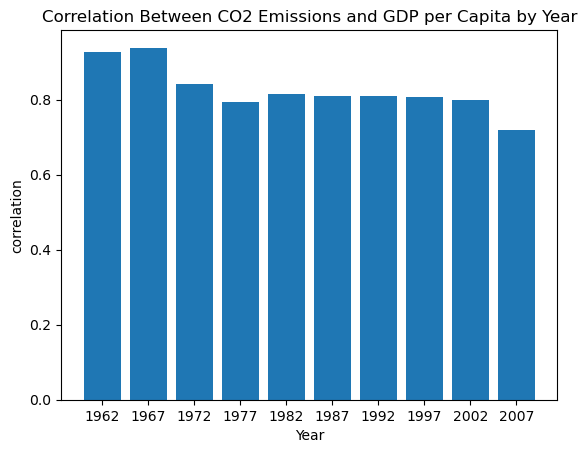

Year with strongest correlation: 1967


In [ ]:
corr_dic = {}
for year, group in df_groups:
    group = group.dropna(subset=["CO2 emissions (metric tons per capita)", "gdpPercap"])
    corr, _ = pearsonr(group['CO2 emissions (metric tons per capita)'], group['gdpPercap'])
    corr_dic[year] = corr

corr_sorted = sorted(corr_dic.items(),key=lambda x:x[1],reverse=True)
strongest_year = corr_sorted[0][0]
plt.figure()
plt.bar(range(len(corr_dic.keys())), corr_dic.values())
plt.xticks(ticks=range(len(corr_dic.keys())),labels=corr_dic.keys())
plt.xlabel('Year')
plt.ylabel('correlation')
plt.title('Correlation Between CO2 Emissions and GDP per Capita by Year')
plt.show()
print('Year with strongest correlation: {}'.format(strongest_year))

### 5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
data_strongest = df[df['Year']==strongest_year]
fig = px.scatter(data_strongest,
                 x='CO2 emissions (metric tons per capita)',
                 y='gdpPercap',
                 size='pop',              
                 color='continent',
                 hover_name='Country Name',
                 size_max=60,
                 title='CO2 Emissions vs GDP per Capita (Bubble Chart)',
                 width=800, 
                 height=600)
fig.show()

## unguided practices

### 1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

In [ ]:
df_1 = df.dropna(subset=['continent', 'Energy use (kg of oil equivalent per capita)'])
df_1_continent = df_1[['continent','Energy use (kg of oil equivalent per capita)']]
df_1_continent.columns = ['continent','energy_use']

To determine whether there are statistically significant differences between the means of three or more independent groups (here are continents), we use ANOVA.  

H0: The means of energy use are the same across continents.  
H1: There is at least one continent which has a different mean of energy use from the others.  

level of significance = 0.05

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('energy_use ~ continent',data=df_1_continent).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df          F        PR(>F)
continent  7.714825e+08    4.0  51.459158  8.527003e-39
Residual   3.159592e+09  843.0        NaN           NaN


The anova table shows that the p value is less than 0.05. Thus, we reject the null hypothesis and conclude that there is at least one continent which has a different mean of energy use from the others.   

Next, we'd like to figure out which two continents have the statistically significant difference in energy use. Therefore, we perform post hoc test. Here we use Tukey's test.

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_1_continent['energy_use'], groups=df_1_continent['continent'], alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
  Africa Americas 1005.1037    0.0  466.8326 1543.3748   True
  Africa     Asia 1168.7636    0.0  628.2529 1709.2742   True
  Africa   Europe 2447.5453    0.0 1947.3838 2947.7067   True
  Africa  Oceania 3281.7976    0.0  2040.341 4523.2543   True
Americas     Asia  163.6599 0.9256  -384.416  711.7357  False
Americas   Europe 1442.4416    0.0  934.1141 1950.7691   True
Americas  Oceania  2276.694    0.0 1031.9249  3521.463   True
    Asia   Europe 1278.7817    0.0  768.0834 1789.4801   True
    Asia  Oceania 2113.0341    0.0   867.295 3358.7732   True
  Europe  Oceania  834.2524 0.3422 -394.5176 2063.0223  False
-------------------------------------------------------------


From the tukey table, we can see that Africa-Americas, Africa-Asia, Africa-Europe, Africa-Oceania, Americas-Europe, Americas-Oceania, Asia-Europe, Asia-Oceania are significantly different (p<0.05).

### 2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

In [22]:
df_2 = df.dropna(subset=['Imports of goods and services (% of GDP)'])
df_2_1990 = df_2[df_2['Year']>1990]
df_2_1990 = df_2_1990[df_2_1990['continent'].isin(['Europe','Asia'])]

To determine whether there are statistically significant differences between the means of two independent groups (here are Europe and Asia), we use t-test.  

H0: The means of imports of goods and services (% of GDP) are the same between Europe and Asia after 1990.  
H1: There is a difference in imports of goods and services (% of GDP) between Europe and Asia after 1990.  

level of significance = 0.05

In [30]:
from scipy.stats import ttest_ind
eu = df_2_1990[df_2_1990['continent']=='Europe']['Imports of goods and services (% of GDP)']
asia = df_2_1990[df_2_1990['continent']=='Asia']['Imports of goods and services (% of GDP)']
t_stat, p_val = ttest_ind(eu, asia)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -1.4185256887958868
p-value: 0.157519693255542


### 3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

In [32]:
df_3 = df[['Year','Country Name','Population density (people per sq. km of land area)']]

In [ ]:
# replace NaN with linear interpolation
filled_df = pd.DataFrame()
for country, group in df_3.groupby('Country Name'):
    group.sort_values(by = 'Year', inplace = True)
    group['Population density (people per sq. km of land area)'] = group['Population density (people per sq. km of land area)'].interpolate(method='linear')
    filled_df = pd.concat([filled_df, group],ignore_index=True)

filled_df

,Year,Country Name,Population density (people per sq. km of land area)
0,1962,Afghanistan,14.312061
1,1967,Afghanistan,15.881812
2,1972,Afghanistan,17.947027
3,1977,Afghanistan,19.998926
4,1982,Afghanistan,19.402324
...,...,...,...
2602,1987,Zimbabwe,24.649495
2603,1992,Zimbabwe,28.485762
2604,1997,Zimbabwe,31.174507
2605,2002,Zimbabwe,32.807111


In [38]:
# Rank countries by population density within each year
filled_df['rank'] = filled_df.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False, method='min')

# Compute average rank for each country
avg_ranks = filled_df.groupby('Country Name')['rank'].mean()

# Find the country or countries with the best (lowest) average rank
min_rank = avg_ranks.min()
top_countries = avg_ranks[avg_ranks == min_rank].index.tolist()

print("Top countries with the highest average population density ranking:")
print(top_countries)


Top countries with the highest average population density ranking:
['Macao SAR, China', 'Monaco']


### 4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

In [41]:
df_4 = df[['Year','Country Name','Life expectancy at birth, total (years)']]

In [58]:
df_4 = df_4[(df_4['Year'].isin([1962,2007]))]
df_increase = pd.DataFrame()
for name, group in df_4.groupby('Country Name'):
    group.sort_values(by = 'Year', inplace = True)
    group['increase'] = group['Life expectancy at birth, total (years)'].diff()
    df_increase = pd.concat([df_increase, group],ignore_index=True)

In [59]:
df_increase.sort_values(by = 'increase',ascending=False, inplace = True)
df_increase.dropna(inplace=True)
df_increase.drop('Year',axis= 1,inplace=True)
df_increase.reset_index(drop=True, inplace=True)

df_increase.head()

,Country Name,"Life expectancy at birth, total (years)",increase
0,Maldives,75.399707,36.916146
1,Bhutan,66.293098,33.198951
2,Timor-Leste,65.824195,31.085146
3,Tunisia,74.202439,30.860756
4,Oman,75.123610,30.823098


The country with the largest change is Maldives, followed by Bhutan and Timor-Leste for second and third place.